**_Downloading Financial Data

In [72]:
import numpy as np
import pandas as pd
from pandas_datareader import data, wb
NSE_SCRIPT = data.DataReader(name='AARTIIND.NS', data_source='yahoo',start='2016-11-01')
NSE_SCRIPT.info()
NSE_SCRIPT.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 290 entries, 2016-11-01 to 2017-12-29
Data columns (total 6 columns):
Open         290 non-null float64
High         290 non-null float64
Low          290 non-null float64
Close        290 non-null float64
Adj Close    290 non-null float64
Volume       290 non-null int64
dtypes: float64(5), int64(1)
memory usage: 15.9 KB


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-22,1067.000000,1166.000000,1063.199951,1129.500000,1129.500000,450552
2017-12-26,1129.500000,1147.300049,1112.000000,1117.300049,1117.300049,89380
2017-12-27,1117.000000,1122.650024,1071.000000,1076.900024,1076.900024,63029
2017-12-28,1085.000000,1090.800049,1060.250000,1069.199951,1069.199951,75455
2017-12-29,1086.050049,1156.000000,1085.000000,1133.900024,1133.900024,1088579


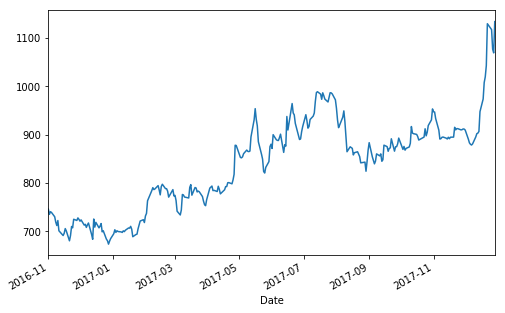

In [73]:
%matplotlib inline
NSE_SCRIPT['Close'].plot(figsize=(8, 5))

In [38]:
NSE_SCRIPT['Ret_Loop'] = 0.0
for i in range(1, len(NSE_SCRIPT)):
    NSE_SCRIPT['Ret_Loop'][i] = np.log(NSE_SCRIPT['Close'][i] /NSE_SCRIPT['Close'][i - 1])

In [39]:
NSE_SCRIPT[['Close', 'Ret_Loop']].tail()

,Close,Ret_Loop
Date,,
2017-12-22,1129.500000,0.079722
2017-12-26,1117.300049,-0.010860
2017-12-27,1076.900024,-0.036829
2017-12-28,1069.199951,-0.007176
2017-12-29,1133.900024,0.058752


In [41]:
NSE_SCRIPT['Return'] = np.log(NSE_SCRIPT['Close'] / NSE_SCRIPT['Close'].shift(1)) #Same as above loop
NSE_SCRIPT[['Close', 'Ret_Loop', 'Return']].tail()

,Close,Ret_Loop,Return
Date,,,
2017-12-22,1129.500000,0.079722,0.079722
2017-12-26,1117.300049,-0.010860,-0.010860
2017-12-27,1076.900024,-0.036829,-0.036829
2017-12-28,1069.199951,-0.007176,-0.007176
2017-12-29,1133.900024,0.058752,0.058752


#### Plotting Volatility

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F8C49B3208>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001F8C4A94BE0>], dtype=object)

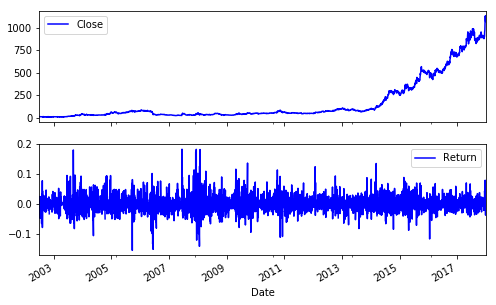

In [44]:
NSE_SCRIPT[['Close', 'Return']].plot(subplots=True, style='b',figsize=(8, 5))

#### Calculating Moving Averages

In [58]:
pd.Series(NSE_SCRIPT['Close']).tail()

Date
2017-12-22    1129.500000
2017-12-26    1117.300049
2017-12-27    1076.900024
2017-12-28    1069.199951
2017-12-29    1133.900024
Name: Close, dtype: float64

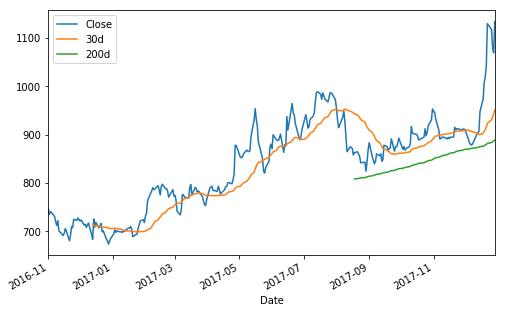

In [79]:
NSE_SCRIPT['30d'] = pd.Series(NSE_SCRIPT['Close']).rolling(window=30).mean()
NSE_SCRIPT['200d'] = pd.Series(NSE_SCRIPT['Close']).rolling(window=200).mean()
NSE_SCRIPT[['Close', '30d', '200d']].plot(figsize=(8, 5))